In [1]:
#Importing phydrus
import os

import phydrus as ps #this works for Meghan using version 0.2.0

import pandas as pd #this works for Meghan using version 2.3.3

import numpy as np #this works for Meghan using version 3.14.64

import matplotlib.pyplot as plt #this works for Meghan using version 3.10.7

import datetime



In [1]:
#Doing working directory stuff

#set working directory manually (I'm sure there is a better way to do this)
#os.chdir('C:\\Users\\meghanrobinson\\Downloads\\Modeling\\PHydrusTest\\PipelineStructure')

#give path to exe file
exe = os.path.join(os.getcwd(), "H1D_CALC.EXE")

#name the folder files will fill
main_level = os.path.normpath(os.path.join(os.getcwd(), os.pardir))
newfolder = 'PHydrus_GrowRoots_25-12-18'
ws = os.path.join(main_level, '3_Results', newfolder)

NameError: name 'os' is not defined

In [38]:
#read in csvs

#Atmospheric Input
atm = pd.read_csv(os.path.join(main_level, '1_Input', 'WeatherData.csv'))
days = len(atm['Date']) #save length of days column for later steps
irrigation = pd.read_csv(os.path.join(main_level, '1_Input', 'IrrigationData.csv'))

#merge weather and irrigation and add for a total water input column
allatm = atm.join(irrigation.set_index('Date'), on='Date')
allatm['WaterIn_cm'] = allatm['Precip'] + allatm['Amount_cm']

#set potential evaporation and transpiration equal to zero by default (will edit in loop below)
allatm['PotenitalEvap'] = 0
allatm['PotentialTransp'] = 0

#add month
allatm['month'] = pd.to_datetime(allatm['Date']).dt.month

#partition ET to either all evaporation or all transpiration based on month (April-Oct all transpiration, everything else evap)
for i in range(1,len(allatm)):
    if allatm['month'][i] == 1:
        allatm['PotenitalEvap'][i] = allatm['ET_cm'][i]
    elif allatm['month'][i] == 2:
        allatm['PotenitalEvap'][i] = allatm['ET_cm'][i]
    elif allatm['month'][i] == 3:
        allatm['PotenitalEvap'][i] = allatm['ET_cm'][i]
    elif allatm['month'][i] == 4:
        allatm['PotentialTransp'][i] = allatm['ET_cm'][i]
    elif allatm['month'][i] == 5:
        allatm['PotentialTransp'][i] = allatm['ET_cm'][i]
    elif allatm['month'][i] == 6:
        allatm['PotentialTransp'][i] = allatm['ET_cm'][i] 
    elif allatm['month'][i] == 7:
        allatm['PotentialTransp'][i] = allatm['ET_cm'][i] 
    elif allatm['month'][i] == 8:
        allatm['PotentialTransp'][i] = allatm['ET_cm'][i] 
    elif allatm['month'][i] == 9:
        allatm['PotentialTransp'][i] = allatm['ET_cm'][i] 
    elif allatm['month'][i] == 10:
        allatm['PotenitalEvap'][i] = allatm['ET_cm'][i] 
    elif allatm['month'][i] == 11:
        allatm['PotenitalEvap'][i] = allatm['ET_cm'][i]
    else:
        allatm['PotenitalEvap'][i] = allatm['ET_cm'][i]

#read in roots data
roots = pd.read_csv(os.path.join(main_level, '1_Input', 'RootData.csv'))
allatm = allatm.join(roots.set_index('month'), on= 'month')

#create new dataframe to manipulate to be exactly what is needed for PHydrus (keeping old version w/ temperature info for now)
atm2 = allatm[['WaterIn_cm', 'PotenitalEvap', 'PotentialTransp', 'RootDepth_cm']]

#these are required column names: 'tAtm', 'Prec', 'rSoil', 'rRoot', 'hCritA', 'rB', 'hB', 'hT'
atm2 = atm2.rename(columns={'PotenitalEvap':'rSoil', 'WaterIn_cm':'Prec', 'PotentialTransp': 'rRoot', 'RootDepth_cm': 'RootDepth'}) #rename columns that are there
atm2['tAtm'] = range(1,len(atm2)+1)
atm2['hCritA']= 1000000 #max allowed surface head, this is hydrus default
atm2['rB']= 0 #bottom flux, is zero for free drainage boundary condition
atm2['hB']= 0 #groundwater level, is zero if model is not being run with groundwater
atm2['hT']= 0 #surface pressure head, zero if model uses free drainage

#rearrange to match format input
atm2 = atm2[['tAtm', 'Prec', 'rSoil', 'rRoot', 'hCritA', 'rB', 'hB', 'hT','RootDepth']]

#Van Genuchten parameters
vgs = pd.read_csv(os.path.join(main_level, '1_Input', 'VGParams.csv'))
vgs_1= vgs.iloc[0, 2:8] #take one row 
vgs_2= vgs.iloc[1, 2:8] #take another row 
vglist1 = list(vgs_1)
vglist2= list(vgs_2)

#Observation Nodes
obs = pd.read_csv(os.path.join(main_level, '1_Input', 'ObservationInput.csv'))
obspts = obs.iloc[:, 2]
obspts= obspts*-1
obslist = list(obspts)

#Timestep list 
timesteps = [0.4] #one that intentionally doesn't work to test
timesteps2 = [0.4, 0.001, 0.003, 0.005, 0.006, 0.0001, 0.0003, 0.0004, 0.01, 0.00002,
             0.00003, 0.00004, 0.00005, 0.00006, 0.00007, 0.00009, 0.0002, 0.0007, 0.0009,
             0.0055, 0.0065, 0.00015, 0.00055, 0.00095] #actual good time steps

C:\Users\meghanrobinson\AppData\Local\Temp\ipykernel_27844\3505106679.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allatm['PotenitalEvap'][i] = allatm['ET_cm'][i]
C:\Users\meghanrobinson\AppData\Local\Temp\ipykernel_27844\3505106679.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.03556' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  allatm['PotenitalEvap'][i] = allatm['ET_cm'][i]
C:\Users\meghanrobinson\AppData\Local\Temp\ipykernel_27844\3505106679.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

c:\Users\meghanrobinson\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\phydrus\model.py:492: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.   

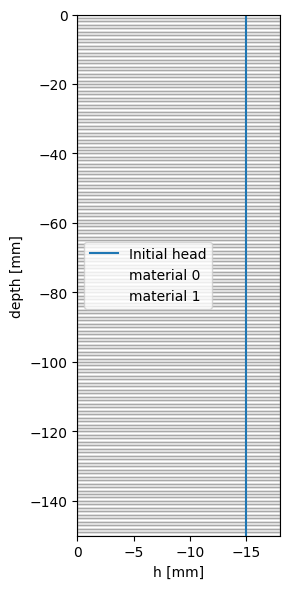

In [71]:
#Do model run

#loop iterating through time steps

for i in range(len(timesteps2)):
    #basic model info (name, units)
    ml = ps.Model(exe_name=exe, #telling it to use single porosity exe
              ws_name=ws, #folder to create/fill (in 3_Results)
              name="model",
              mass_units="mmol", time_unit="days", length_unit="mm")
    #add time info
    times = ml.add_time_info(tinit=0, #first day
                         tmax=days, #last day
                         print_times=True, #true if want model to print t level info every day
                        # printinit= 1,
                         #printmax= 40,
                         #dtprint= 1,
                         dt=timesteps2[i], #initial time increment (this is what R iteratres through)
                         dtmax=0.5, #max time increment (didn't change)
                         #printinit=120 #this would specify when to start printing t level info
                        )
    
    #add waterflow information for selector on model type, boundary conditions, can add groundwater here (didn't)
    ml.add_waterflow(model= 0, #single porosity
                 top_bc=3, #top boundary condition is atmospheric with runoff
                 bot_bc=4, #bottom boundary condition is free drainage
                 )
    
    #this is a dataframe for soil materials, n=1 is number of materials
    m = ml.get_empty_material_df(n=2)
    
    #these are vg parameters for each depth
    m.loc[1:2] = [vglist1, vglist2]
    

    #add materials to function
    ml.add_material(m)
    
    #create soil profile
    profile = ps.create_profile(bot= -150, #depth of soil profile
                            dx= 1, #grid cells 1 cm
                            h=-15 #intial pressure head
                           )
    
    profile.loc[75:150, "Mat"] = 2 #depth to start second soil material

        #add  profile to model
    ml.add_profile(profile)
    
    #observations nodes
    ml.add_obs_nodes(obslist)
    
    poptms= [-1,-1]
    ml.add_root_uptake(model= 0, #feddes water uptake
                   p0= -1, #pressure head below which roots can extract water from soil
                   p2h= -500, #pressure head below which roots cannot extract water at maximum rate
                   p2l= -900, #manual says same as p2h exceot with potential transpiration of 'r2L'
                   p3= -1600, #wilting point: no root water extraction
                   r2h= 0.5,
                   r2l= 0.1,
                   poptm= poptms, #pressure head below which roots extract water at max rate, 1 per soil type
                   pexp= 3, #exponent for stress response function, accepting default of 3
                   crootmax= 1 #this is max concentration of solute for root uptake, this model doesn't have solutes but isn't working without
                   )
    
    #make table of root data
    '''
    rtlist = list(atm2['RootDepth'])
    rtfloat = [float(i) for i in rtlist]

    daylist = list(atm2['tAtm'])
    dayfloat = [float(i) for i in daylist]


    ml.add_root_growth(irootin= 1, #roots are a table
                       ngrowth= len(atm2), #number of data points
                       tgrowth= dayfloat, #days
                       rootdepth= rtfloat #root depths
                       )
    '''
    
    ml.add_root_growth(irootin= 2,
                       irfak= 0, #root growth is calculated from given data
                       trmin= 100, #day when roots start growing
                       trmed= 150, #time of a specific root growth benchmark
                       trmax= 200, #end of root growth period
                       xrmin= 0, #root depth at start of growth period
                       xrmed= 20, #root depth at trmed time
                       xrmax= 35, #max rooting depth
                       trperiod= 365 #number of days in root growth cycle
                       )
    
    #add atmosphere input to Hydrus
    ml.add_atmospheric_bc(atm2)
    
    #write out input files
    ml.write_input()
    
    #run Hydrus!
    rs = ml.simulate()

    #check if model ran completely
    #first step: read in output
    tlevel = ml.read_tlevel()

    #check that output length equals input length, if TRUE stop loop, if FALSE keep going
    if len(tlevel) == days:
        ml.plots.profile()
        break
    else:
        if i == len(timesteps2)-1:
            failed = pd.DataFrame()
            failed.to_csv(os.path.join(main_level, '3_Results', newfolder, 'FAILED.csv'))


c:\Users\meghanrobinson\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\phydrus\read.py:214: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = read_csv(file, skiprows=s, nrows=e - s - 2, usecols=usecols,
c:\Users\meghanrobinson\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\phydrus\read.py:219: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.drop(index=data.index[0]).apply(to_numeric,
c:\Users\meghanrobinson\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\phydrus\read.py:259: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df1 = read_csv(path, skiprows=start, index_col=0, nrows=end - start - 1,


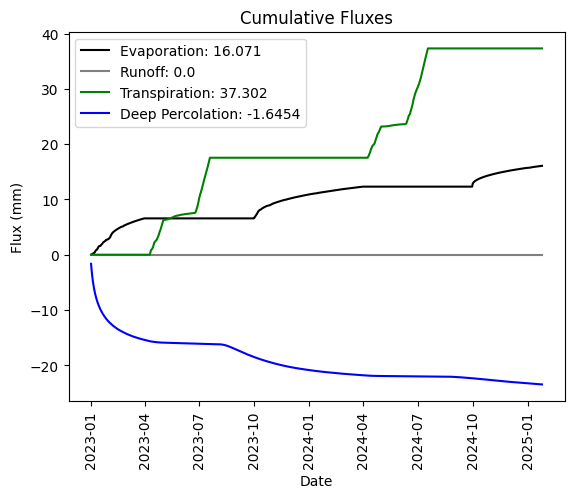

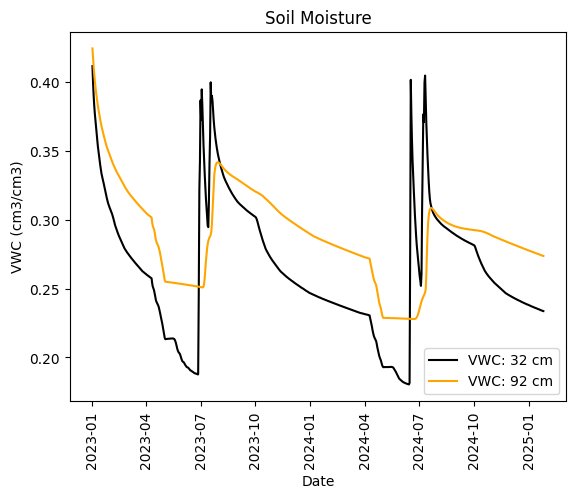

In [75]:
#Read in data and plot!
if ("FAILED.csv" in os.listdir(os.path.join(main_level, '3_Results', newfolder))) == False:
    
    #read in t level and obs node data
    tlevel = ml.read_tlevel(usecols= ['Time','rTop', 'rRoot', 'vTop', 'vRoot', 'vBot', 'sum(rTop)', 'sum(rRoot)', 'sum(vTop)',
'sum(vRoot)', 'sum(vBot)', 'hTop', 'hRoot', 'hBot', 'RunOff', 'sum(RunOff)', 'Volume', 'sum(Infil)', 'sum(Evap)', 'Cum(WTrans)'])
    obsnode = ml.read_obs_node()

    #make obs node data into a dataframe
    allobs = pd.DataFrame()
    
    for i in range(len(obslist)):
       nodenum = obslist[i]*-1+1
       obstemp =obsnode[nodenum]
       obstemp= obstemp.rename(columns={'h':f"h{nodenum}",
                             'theta':f"theta{nodenum}",
                             'Temp':f"temp{nodenum}"})
       allobs = pd.concat([allobs, obstemp], axis=1)

    #merge data to create csv file
    output = pd.concat([tlevel, allobs], axis=1)
    outputr = output.reset_index(drop=True)
    alldata = pd.concat([atm, outputr], axis= 1)


    alldata.to_csv(os.path.join(main_level, '3_Results', newfolder, 'HydrusMergedData.csv'))
    
    #make a new folder for plots to fill
    if not os.path.exists(os.path.join(main_level, '3_Results', newfolder, 'Plots')):
        os.mkdir(os.path.join(main_level, '3_Results', newfolder, 'Plots'))

    #plot cumulative fluxes
    xs= alldata['Date']
    
    from datetime import datetime
    xs = pd.to_datetime(xs)
    y1 = alldata['sum(Evap)']
    y2= alldata['sum(RunOff)']
    y3= alldata['sum(vRoot)']
    y4= alldata['sum(vBot)']
    
    #get maxes to include on plot
    emax = max(alldata['sum(Evap)'])
    tmax = max(alldata['sum(vRoot)'])
    dmax = max(alldata['sum(vBot)'])
    rmax = max(alldata['sum(RunOff)'])
    
    #plt.plot(xs, y1, xs, y2, xs, y3, xs, y4)
    plt.plot(xs, y1, label= f"Evaporation: {emax}", c= "black")
    plt.plot(xs, y2, label= f"Runoff: {rmax}", c= "gray")
    plt.plot(xs, y3, label= f"Transpiration: {tmax}", c= "green")
    plt.plot(xs, y4, label= f"Deep Percolation: {dmax}", c= "blue")
    
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Flux (mm)")
    plt.title("Cumulative Fluxes")
    plt.xticks(rotation= 90)
    
    plt.savefig(os.path.join(main_level, '3_Results', newfolder, 'Plots', 'CumulativeFluxes.png'))
    plt.show()
    #plot soil moisture at specified depths
    y1 = alldata['theta32']
    y2= alldata['theta92']
    
    plt.plot(xs, y1, label= "VWC: 32 cm", c= "black")
    plt.plot(xs, y2, label= "VWC: 92 cm", c= "orange")
    
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("VWC (cm3/cm3)")
    plt.title("Soil Moisture")
    plt.xticks(rotation= 90)

    plt.savefig(os.path.join(main_level, '3_Results', newfolder, 'Plots', 'SoilMoisture.png'))
    plt.show()
    

